# 전복 데이터의 분류 모델을 사전 훈련 및 미세 조정을 통해 회귀 모델로 변환

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# 전복 데이터 불러오기 
df = pd.read_csv("C:/Users/tansy/Ai/abalone.csv", index_col=0)

In [84]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


<span style="font-size:40px">==== 데이터 전처리 ========</span>

## 1. 정답 레이블 분포 확인하기 

Text(0.5, 1.0, 'Rings')

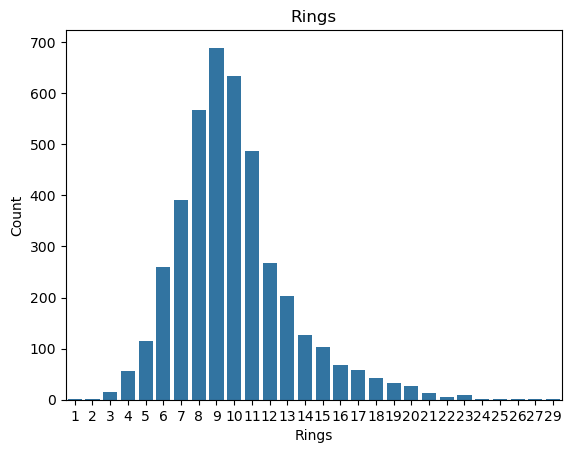

In [5]:
sns.countplot(data= df , x="Rings") 
plt.xlabel("Rings")
plt.ylabel('Count')
plt.title("Rings") 

In [6]:
df['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

## => 데이터 불균형 발생 : 전처리 필요

## Rings 값이 4 이하이면 4, 21 이상이면 21로 제한

Text(0.5, 1.0, 'Rings')

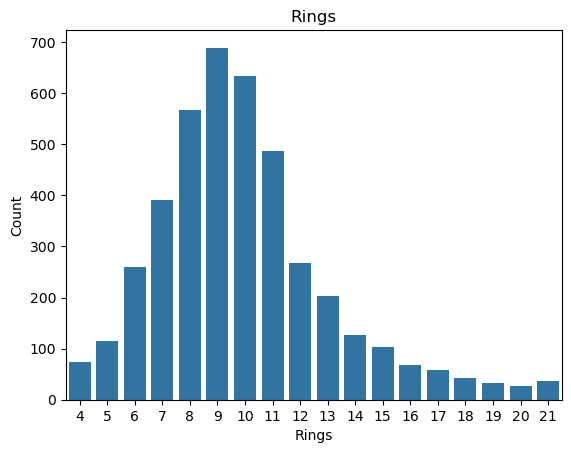

In [7]:
import numpy as np


df['Rings'] = np.clip(df['Rings'], 4, 21)

sns.countplot(data= df , x="Rings") 
plt.xlabel("Rings")
plt.ylabel('Count')
plt.title("Rings") 

## 2. 문자형 데이터 Label Encoding

Text(0.5, 1.0, 'Sex')

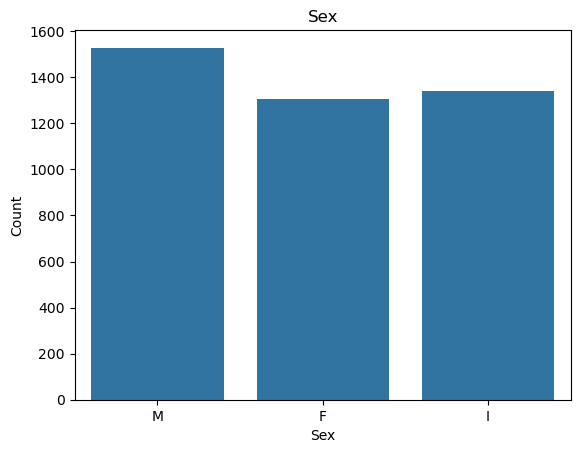

In [8]:
sns.countplot(data= df , x="Sex") 
plt.xlabel("Sex")
plt.ylabel('Count')
plt.title("Sex") 

In [85]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])


Text(0.5, 1.0, 'Sex')

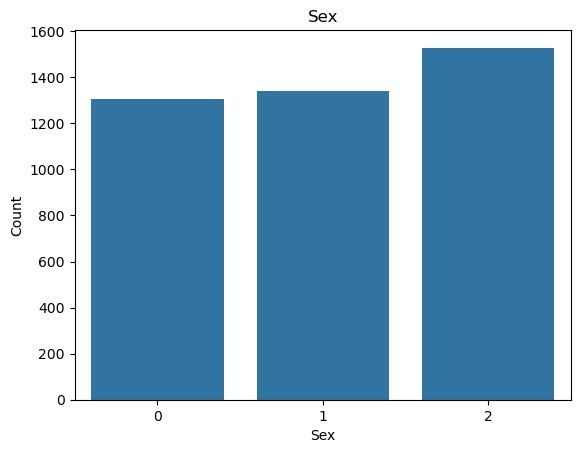

In [10]:
sns.countplot(data= df , x="Sex") 
plt.xlabel("Sex")
plt.ylabel('Count')
plt.title("Sex") 

## 3. 결측치 확인 및 제거하기 

In [11]:
# 결측치 확인. 결측치란 : 데이터에 값이 없는 것.(Null), 속성값 0 => 결측치 없음 
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [12]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

<span style="font-size:40px">== 딥러닝 분류 모델 생성 ==</span>

## 1. 레이블 분류

In [13]:
# 레이블 제거한 데이터 

X = df.drop('Rings', axis=1)
X.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [14]:
# Y => 레이블, 분류 => 4부터 21까지 => 18개 

y = df['Rings']
y.value_counts().sort_index()

Rings
4      74
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     36
Name: count, dtype: int64

## 2. 데이터 분할(Train/Test Split)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. 레이블 원-핫 인코딩 

In [16]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train - 4)  # 4부터 시작하도록 조정
y_test = to_categorical(y_test - 4)

print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


## 4. 모델 구축 

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(18, activation='softmax')  # 클래스 수가 4~21이므로 총 18개 클래스
])


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5. 모델 컴파일

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 6. 모델 학습

In [19]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.1174 - loss: 2.7634 - val_accuracy: 0.1704 - val_loss: 2.3784
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1580 - loss: 2.4746 - val_accuracy: 0.2302 - val_loss: 2.3165
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1707 - loss: 2.4393 - val_accuracy: 0.2302 - val_loss: 2.2548
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1917 - loss: 2.3441 - val_accuracy: 0.2272 - val_loss: 2.2037
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2086 - loss: 2.2822 - val_accuracy: 0.2317 - val_loss: 2.1661
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2085 - loss: 2.2668 - val_accuracy: 0.2496 - val_loss: 2.1432
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2250 - loss: 2.2250 - val_accuracy: 0.2392 - val_loss: 2.1208
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2263 - loss: 2.1992 - val_accuracy: 0.2526 - 

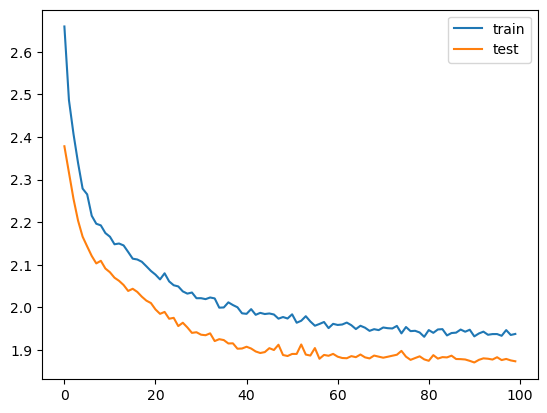

In [20]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

## 7. 모델 평가 

In [21]:
model.evaluate(X_train, y_train)

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2990 - loss: 1.8896


[1.8825035095214844, 0.28763842582702637]

In [22]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2879 - loss: 1.9103


[1.9016541242599487, 0.2966507077217102]

## 혼동 행렬 및 히트맵 그리기 

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Confusion Matrix


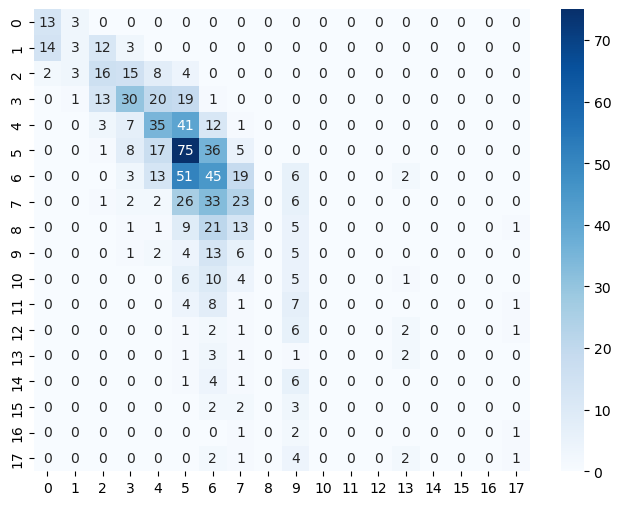

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# 원 핫 인코딩 => 정수형 레이블 변환 
y_test_arg=np.argmax(y_test, axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1) # => 예측값 
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

## => test 데이터 10~17부분이 거의 없음. 또한 레이블별 데이터가 너무 적기 때문에 정확도 낮다고 판단 => K겹 교차 검증 수행

<span style="font-size:40px">== K겹 교차 검증 수행 모델 ==</span>

## 1. 데이터 준비

In [24]:
# 레이블 제거한 데이터 

X = df.drop('Rings', axis=1)
X.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [25]:
y = df['Rings']
y_encoded = to_categorical(y-4) # => 원 핫 인코딩으로 변환 

# DataFrame으로 변환하여 클래스별로 보기 좋게 출력
y_df = pd.DataFrame(y_encoded, columns=[f'Class_{i}' for i in range(y_encoded.shape[1])])

# 원본 y와 원-핫 인코딩 결과 결합
result = pd.concat([y.reset_index(drop=True), y_df], axis=1)

# 결과 출력
print(result.head())  # 상위 5개 행 출력


   Rings  Class_0  Class_1  Class_2  Class_3  Class_4  Class_5  Class_6  \
0     15      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      7      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
2      9      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
3     10      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
4      7      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

   Class_7  Class_8  Class_9  Class_10  Class_11  Class_12  Class_13  \
0      0.0      0.0      0.0       0.0       1.0       0.0       0.0   
1      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
2      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
3      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
4      0.0      0.0      0.0       0.0       0.0       0.0       0.0   

   Class_14  Class_15  Class_16  Class_17  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       

In [26]:
y = y_encoded

## 2.  Keras 모델을 sc ikit-learn과 호환되도록 래핑

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # 입력 특성 수에 맞게 조정
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(18, activation='softmax'))  # 클래스 수에 맞게 조정
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=20, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def score(self, X, y):
        y_pred = self.predict(X)
        y_true = np.argmax(y, axis=-1)
        return np.mean(y_pred == y_true)## 3. 모델 생성

## 3. 교차 검증 수행

In [28]:
model_K = KerasClassifier()

# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model_K, X, y, cv=kf)


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


## 4. 결과 출력 

In [29]:
print("각 폴드의 정확도:", scores)
print("평균 정확도:", np.mean(scores))

각 폴드의 정확도: [0.28110048 0.28349282 0.25149701 0.24670659 0.27305389]
평균 정확도: 0.26717015729306937


# K-겹 교차 검증을 했음에도 현저히 낮은 수치 => 각 레이블 별 데이터 값이 너무 낮기 때문이라고 판단함.

<span style="font-size:40px">== Rings(레이블)값 범주화 ==</span>

In [30]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


## Rings 값 5단위로 범주화하기

In [31]:
import pandas as pd

df_c = df

bins = [0, 5, 10, 15, 20,30]  # 구간 설정
labels = [0,1,2,3,4]
df_c['Rings'] = pd.cut(df_c['Rings'], bins=bins, labels=labels).astype(int)

Text(0.5, 1.0, 'Rings')

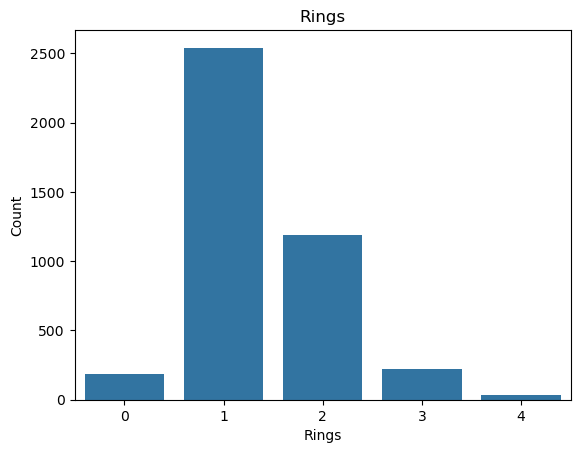

In [32]:
sns.countplot(data= df_c , x="Rings") 
plt.xlabel("Rings")
plt.ylabel('Count')
plt.title("Rings") 

## Sex 문자값을 정수형으로 변환

In [33]:
from sklearn.preprocessing import LabelEncoder

# 문자열 => 정수값(0~2)로 변환 
label_encoder = LabelEncoder()
df_c['Sex'] = label_encoder.fit_transform(df_c['Sex'])

In [34]:
print(df_c['Sex'].head())

id
0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int64


## 1. 훈련 데이터 준비 

In [35]:
X = df.drop('Rings', axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [36]:
y = df_c['Rings']
y = to_categorical(y)
print(y)

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


## 2. 교차 검증 준비 

In [37]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))  # 입력 특성 수에 맞게 조정
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(5, activation='softmax'))  # 클래스 수에 맞게 조정
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=20, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def score(self, X, y):
        y_pred = self.predict(X)
        y_true = np.argmax(y, axis=-1)
        return np.mean(y_pred == y_true)## 3. 모델 생성

## 3. 교차 검증 수행

In [38]:
model_C = KerasClassifier()

# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model_C, X, y, cv=kf)

C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


## 모델 평가 

In [39]:
print(np.mean(scores))

0.6909302925249978


## 30프로의 정확도 => 68.9프로로 정확도 향상

# 모델 저장 

In [40]:
model_file = 'C:/Users/tansy/Ai/Model_C.keras'
tf.keras.models.save_model(model_C.model, model_file, include_optimizer=False)
print('Model saved at', model_file)

AttributeError: 'NoneType' object has no attribute 'built'

<span style="font-size:40px">== 사전 훈련 및 미세 조정 ==</span> 

## 1. 기존의 모델 로드하기

In [109]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [110]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  5


In [111]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

In [112]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def remove_last_layers(model, num_layers_to_remove):
    # 모델의 레이어를 하나씩 슬라이스해서 앞의 레이어만 가져옴
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential(model_layers)  # 새로운 모델에 해당 레이어들만 추가
    return new_model


# 기존 모델에서 출력층부터 1개의 레이어를 삭제 
new_model = remove_last_layers(base_model, 1)

# 새로운 은닉층 1개 + 출력층 1개 추가
new_model.add(layers.Dense(32, activation='relu'))
new_model.add(layers.Dropout(0.5))
new_model.add(Dense(1,activation='linear'))  # 1개의 출력층
new_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

# 모델 요약 출력
new_model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_183 (Dense)                    │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_122 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_123 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,656 (10.38 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,656 (10.38 KB)

## 데이터 준비 

In [89]:
y = df['Rings']
y.value_counts().sort_index()

Rings
0     189
1    2541
2    1186
3     225
4      36
Name: count, dtype: int64

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 모델 훈련

In [115]:
new_history = new_model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.9755 - mse: 1.9755 - val_loss: 0.3988 - val_mse: 0.3988
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8026 - mse: 0.8026 - val_loss: 0.3638 - val_mse: 0.3638
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6316 - mse: 0.6316 - val_loss: 0.3661 - val_mse: 0.3661
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5416 - mse: 0.5416 - val_loss: 0.3457 - val_mse: 0.3457
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4731 - mse: 0.4731 - val_loss: 0.3413 - val_mse: 0.3413
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4349 - mse: 0.4349 - val_loss: 0.3397 - val_mse: 0.3397
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4627 - mse: 0.4627 - val_loss: 0.3592 - val_mse: 0.3592
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4464 - mse: 0.4464 - val_loss: 0.3209 - val_mse: 0.3209
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4286 - mse: 

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_183 (Dense)                    │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_122 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_123 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,925 (23.15 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 2,656 (10.38 KB)

 Optimizer params: 2,180 (8.52 KB)

In [116]:
new_model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3019 - mse: 0.3019 


[0.29116523265838623, 0.29116523265838623]

## => 정확도 약 30프로로 현저히 낮은 모습 

# Fine Tunning 미세 조정

In [117]:
# 가중치 조정 가능하게 설정
base_model.trainable = True
new_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [118]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<Dense name=dense_183, built=True>",dense_183,True
1,"<Dropout name=dropout_122, built=True>",dropout_122,True
2,"<Dense name=dense_184, built=True>",dense_184,True
3,"<Dropout name=dropout_123, built=True>",dropout_123,True
4,"<Dense name=dense_63, built=True>",dense_63,True
5,"<Dropout name=dropout_23, built=True>",dropout_23,True
6,"<Dense name=dense_64, built=True>",dense_64,True


In [119]:
history3 = new_model.fit(X, y, epochs = 20, batch_size = 32, validation_split = 0.1, shuffle = True)

new_model.summary()

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3440 - mse: 0.3440 - val_loss: 0.2404 - val_mse: 0.2404
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3381 - mse: 0.3381 - val_loss: 0.2466 - val_mse: 0.2466
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3187 - mse: 0.3187 - val_loss: 0.2400 - val_mse: 0.2400
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3189 - mse: 0.3189 - val_loss: 0.2429 - val_mse: 0.2429
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3112 - mse: 0.3112 - val_loss: 0.2392 - val_mse: 0.2392
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3074 - mse: 0.3074 - val_loss: 0.2348 - val_mse: 0.2348
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3018 - mse: 0.3018 - val_loss: 0.2390 - val_mse: 0.2390
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2991 - mse: 0.2991 - val_loss: 0.2456 - val_mse: 0.2456
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_183 (Dense)                    │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_122 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_123 (Dropout)                │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,237 (43.90 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,492 (29.27 KB)